In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

In [9]:
class F14:
    name = 'F-14'
    B = np.array([500.0,600.0,700.0,800.0,900.0,1000.0,1100.0,1200.0,1300.0])
    A = 111
    C = np.array([])
    D = np.array([])
    gamma = np.array([])
    Res = pd.DataFrame()

class F18:
    name = 'F/A-18'
    B = np.array([500.0,600.0,700.0,800.0,900.0,1000.0,1100.0,1200.0,1300.0])
    A = 70
    C = np.array([])
    D = np.array([])
    gamma = np.array([])
    Res = pd.DataFrame()
    
def sqrt(B,C):
    return( np.sqrt(np.power(B,2) - np.power(C,2)))

def angle(C,B,D):
    return( np.rad2deg( np.arccos( (C*C+B*B-D*D)/(2*C*B))))

def calc(Fighter):
    Fighter.C = Fighter.B-Fighter.A
    Fighter.D = sqrt(Fighter.B,Fighter.C)
    Fighter.gamma = angle(Fighter.C,Fighter.B,Fighter.D)
    Fighter.Res = pd.DataFrame(np.stack((Fighter.B,Fighter.gamma)).T, columns=['{} Velocity'.format(Fighter.name),'TrackAngle'])

def drawplot(Fighter):
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(projection='polar')

    theta = np.array(np.deg2rad(Fighter.gamma)) #angle
    R = np.array(Fighter.B) #scale

    for i in range(R.size):
        ax.plot([0,theta[i]], [0,R[i]], linewidth=1)  
        ax.text(theta[i],R[i],['{:.0f}kn'.format(Fighter.B[i]),'{:.2f}° '.format(Fighter.gamma[i])])

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_rticks([250,500,750,1000,1250,1500])  # Less radial ticks
    ax.set_xticks(np.pi/180. * np.linspace(0,  90, 6, endpoint=False))
    ax.set_rlabel_position(90) # Rotate ticks
    ax.set_thetamin(0)
    ax.set_thetamax(90)
    ax.set_title('{} Minimal AON'.format(Fighter.name), fontdict={'fontsize':40},loc='center')
    
alpha = 90

Button(description='F-14', style=ButtonStyle())

Button(description='F-18', style=ButtonStyle())

   F-14 Velocity  TrackAngle
0          500.0   38.922180
1          600.0   35.412638
2          700.0   32.708718
3          800.0   30.542776
4          900.0   28.757157
5         1000.0   27.252145
6         1100.0   25.961173
7         1200.0   24.837876
8         1300.0   23.848835


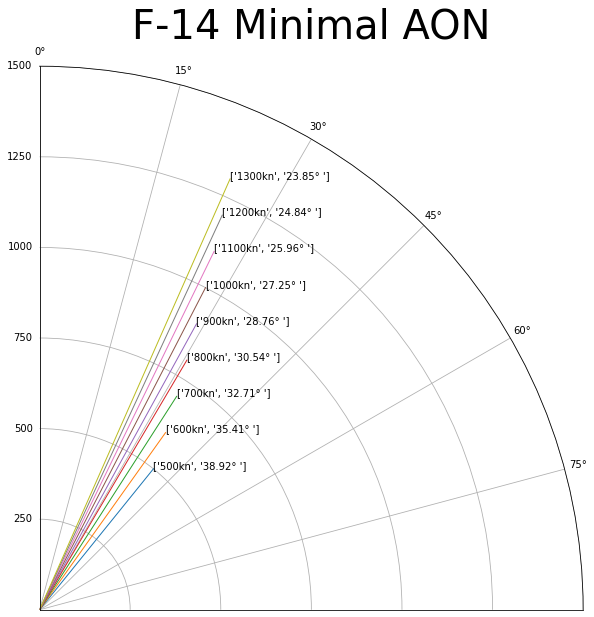

   F/A-18 Velocity  TrackAngle
0            500.0   30.683417
1            600.0   27.952887
2            700.0   25.841933
3            800.0   24.146848
4            900.0   22.746851
5           1000.0   21.565185
6           1100.0   20.550422
7           1200.0   19.666638
8           1300.0   18.887882


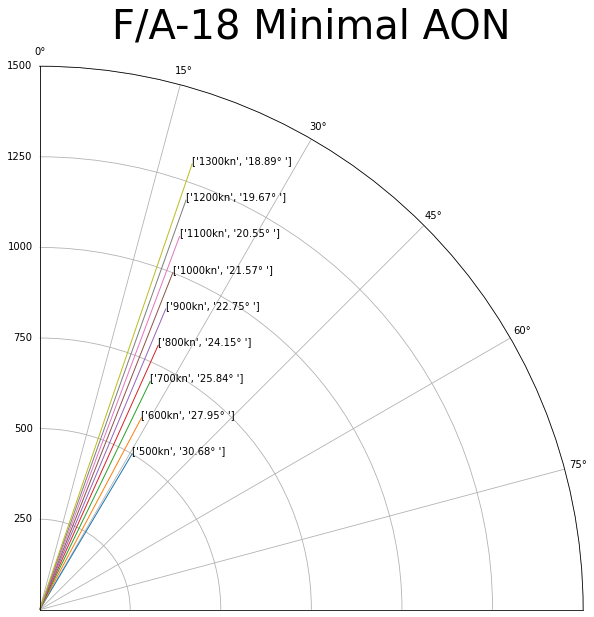

In [10]:
def clicked_f14(arg):
    Fighter1 = F14
    calc(Fighter1)
    print(Fighter1.Res)
    drawplot(Fighter1)

def clicked_f18(arg):
    Fighter1 = F18
    calc(Fighter1)
    print(Fighter1.Res)
    drawplot(Fighter1)

button_f14 = widgets.Button(description = 'F-14')   
button_f14.on_click(clicked_f14)
display(button_f14)

button_f18 = widgets.Button(description = 'F-18')   
button_f18.on_click(clicked_f18)
display(button_f18)